In [1]:
import numpy as np # linear algebra
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import math

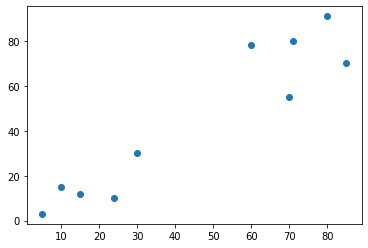

In [2]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91]])
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.show()

In [8]:
def single_distance(clusters,cluster_num):
    i=1
    while len(clusters) is not cluster_num:       
        closest_distance=clust_1=clust_2 = math.inf   #把初始最小距离设置成无穷大
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): #分别找到两个类
                for point_id,point in enumerate(cluster): 
                    for point2_id, point2 in enumerate(cluster2):    #分别找到两个类中的点
                        if np.linalg.norm(np.array(point)-np.array(point2)) < closest_distance:  #如果两点之间的欧氏距离小于最小距离，赋值给closet_distance
                            closest_distance = np.linalg.norm(np.array(point)-np.array(point2))
                            clust_1 = cluster_id
                            clust_2 = cluster2_id+cluster_id+1 #这个类最后会与clust_1合并
        print('Merge step:',i)
        print('first cluster:',clusters[clust_1])
        print('second cluster:',clusters[clust_2])
        clusters[clust_1].extend(clusters[clust_2]) #clust_1,clust_2合并
        del(clusters[clust_2])
        i=i+1
    return(clusters)

def hierarchical(data, cluster_num):
    # initialization of clusters at first (every point is a cluster)
    init_clusters=[]
    for i in range(len(data)):
        init_clusters.append([[data[i,0],data[i,1]]])
    print(init_clusters)
    return single_distance(init_clusters, cluster_num)



[[[5, 3]], [[10, 15]], [[15, 12]], [[24, 10]], [[30, 30]], [[85, 70]], [[71, 80]], [[60, 78]], [[70, 55]], [[80, 91]]]
Merge step: 1
first cluster: [[10, 15]]
second cluster: [[15, 12]]
Merge step: 2
first cluster: [[10, 15], [15, 12]]
second cluster: [[24, 10]]
Merge step: 3
first cluster: [[71, 80]]
second cluster: [[60, 78]]
Merge step: 4
first cluster: [[5, 3]]
second cluster: [[10, 15], [15, 12], [24, 10]]
Merge step: 5
first cluster: [[71, 80], [60, 78]]
second cluster: [[80, 91]]
Merge step: 6
first cluster: [[85, 70]]
second cluster: [[71, 80], [60, 78], [80, 91]]
Merge step: 7
first cluster: [[5, 3], [10, 15], [15, 12], [24, 10]]
second cluster: [[30, 30]]
Merge step: 8
first cluster: [[85, 70], [71, 80], [60, 78], [80, 91]]
second cluster: [[70, 55]]


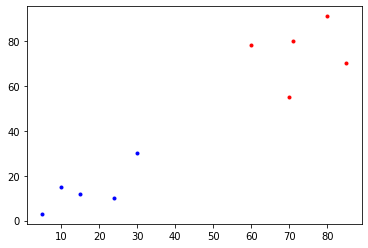

In [9]:
clusters = hierarchical(X,2)
colors = ['blue', 'red', 'purple', 'teal']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])

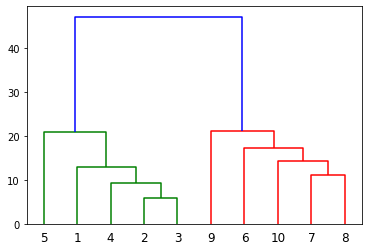

In [12]:
linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure()
dendrogram(linked, labels=labelList)
plt.show()